In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
itpd = pd.read_stata(r'C:/Users/pedro/Desktop/6 Semestre/aps_comercio/itpd.dta')
itpd.head()

,exporter_iso3,exporter_m49,importer_iso3,importer_m49,year,industry_id,broad_sector,trade,flag_mirror,flag_zero
0,ABW,Aruba,AGO,Angola,2000,Refined petroleum products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
1,ABW,Aruba,AGO,Angola,2000,Structural metal products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
2,ABW,Aruba,AGO,Angola,2000,Pumps compressors taps and valves,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
3,ABW,Aruba,AGO,Angola,2000,Other general purpose machinery,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
4,ABW,Aruba,AGO,Angola,2000,TV and radio receivers and associated goods,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"


In [3]:
itpd['trade'] = itpd['trade'] / 10**9
itpd = itpd[itpd['exporter_iso3'] != itpd['importer_iso3']]
itpd.head()

,exporter_iso3,exporter_m49,importer_iso3,importer_m49,year,industry_id,broad_sector,trade,flag_mirror,flag_zero
0,ABW,Aruba,AGO,Angola,2000,Refined petroleum products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
1,ABW,Aruba,AGO,Angola,2000,Structural metal products,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
2,ABW,Aruba,AGO,Angola,2000,Pumps compressors taps and valves,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
3,ABW,Aruba,AGO,Angola,2000,Other general purpose machinery,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"
4,ABW,Aruba,AGO,Angola,2000,TV and radio receivers and associated goods,Manufacturing,0.0,Reported value,"u: Missing (unknown, assigned zero)"


In [4]:
itpd_e = itpd[['exporter_m49','broad_sector','year','trade']]
itpd_e.rename(columns = {'exporter_m49':'Country', 'broad_sector':'Indústria','trade':'Export'}, inplace = True)
itpd_e

C:\Users\pedro\AppData\Local\Temp\ipykernel_33616\4289767350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itpd_e.rename(columns = {'exporter_m49':'Country', 'broad_sector':'Indústria','trade':'Export'}, inplace = True)


,Country,Indústria,year,Export
0,Aruba,Manufacturing,2000,0.000000e+00
1,Aruba,Manufacturing,2000,0.000000e+00
2,Aruba,Manufacturing,2000,0.000000e+00
3,Aruba,Manufacturing,2000,0.000000e+00
4,Aruba,Manufacturing,2000,0.000000e+00
...,...,...,...,...
38518190,Zimbabwe,Manufacturing,2016,1.028200e-11
38518191,Zimbabwe,Manufacturing,2016,0.000000e+00
38518192,Zimbabwe,Manufacturing,2016,1.150000e-13
38518193,Zimbabwe,Manufacturing,2016,2.748000e-12


In [5]:
# a) 
export_per_sector = itpd_e.groupby(['Country','Indústria','year']).agg(Export=('Export', 'sum'))
export_per_sector

Export
Country     Indústria   year              
Afghanistan Agriculture 2000  6.968200e-08
                        2001  4.295700e-08
                        2002  4.737800e-08
                        2003  7.414500e-08
                        2004  8.118300e-08
...                                    ...
Zambia      Services    2012  0.000000e+00
                        2013  0.000000e+00
                        2014  5.288000e-12
                        2015  3.781662e-09
                        2016  0.000000e+00

[16388 rows x 1 columns]

In [6]:
# b) 
export_per_sector['Exportações Ano'] = export_per_sector.groupby(['Country', 'year'])['Export'].transform('sum')
export_per_sector


Export  Exportações Ano
Country     Indústria   year                               
Afghanistan Agriculture 2000  6.968200e-08     1.007940e-07
                        2001  4.295700e-08     7.219116e-08
                        2002  4.737800e-08     7.481276e-08
                        2003  7.414500e-08     1.580398e-07
                        2004  8.118300e-08     1.232708e-07
...                                    ...              ...
Zambia      Services    2012  0.000000e+00     9.205841e-06
                        2013  0.000000e+00     1.315121e-05
                        2014  5.288000e-12     8.694275e-06
                        2015  3.781662e-09     6.825118e-06
                        2016  0.000000e+00     5.481148e-06

[16388 rows x 2 columns]

In [7]:
export_per_sector['Vantagem Absoluta'] = (export_per_sector['Export']/export_per_sector['Exportações Ano'])
export_per_sector


Export  Exportações Ano  Vantagem Absoluta
Country     Indústria   year                                                  
Afghanistan Agriculture 2000  6.968200e-08     1.007940e-07       6.913305e-01
                        2001  4.295700e-08     7.219116e-08       5.950451e-01
                        2002  4.737800e-08     7.481276e-08       6.332877e-01
                        2003  7.414500e-08     1.580398e-07       4.691539e-01
                        2004  8.118300e-08     1.232708e-07       6.585747e-01
...                                    ...              ...                ...
Zambia      Services    2012  0.000000e+00     9.205841e-06       0.000000e+00
                        2013  0.000000e+00     1.315121e-05       0.000000e+00
                        2014  5.288000e-12     8.694275e-06       6.082163e-07
                        2015  3.781662e-09     6.825118e-06       5.540801e-04
                        2016  0.000000e+00     5.481148e-06       0.000000e+00

[16388 rows x 3 columns]

In [8]:
# c) 
# EXit representa as exportacoes totais da industria i no ano t e EXt as exportacoes
# totais no ano t.

export_per_sector['Exportações Industria Ano'] = export_per_sector.groupby(['Indústria', 'year'])['Export'].transform('sum')
export_per_sector



Export  Exportações Ano  \
Country     Indústria   year                                  
Afghanistan Agriculture 2000  6.968200e-08     1.007940e-07   
                        2001  4.295700e-08     7.219116e-08   
                        2002  4.737800e-08     7.481276e-08   
                        2003  7.414500e-08     1.580398e-07   
                        2004  8.118300e-08     1.232708e-07   
...                                    ...              ...   
Zambia      Services    2012  0.000000e+00     9.205841e-06   
                        2013  0.000000e+00     1.315121e-05   
                        2014  5.288000e-12     8.694275e-06   
                        2015  3.781662e-09     6.825118e-06   
                        2016  0.000000e+00     5.481148e-06   

                              Vantagem Absoluta  Exportações Industria Ano  
Country     Indústria   year                                                
Afghanistan Agriculture 2000       6.913305e-01                   0.000167  
                        2001       5.950451e-01                   0.000164  
                        2002       6.332877e-01                   0.000171  
                        2003       4.691539e-01                   0.000203  
                        2004       6.585747e-01                   0.000234  
...                                         ...                        ...  
Zambia      Services    2012       0.000000e+00                   0.002977  
                        2013       0.000000e+00                   0.002768  
                        2014       6.082163e-07                   0.003249  
                        2015       5.540801e-04                   0.003130  
                        2016       0.000000e+00                   0.003126  

[16388 rows x 4 columns]

In [9]:
export_per_sector['Vantagem Comparativa'] = export_per_sector['Vantagem Absoluta']/((export_per_sector['Exportações Industria Ano']/export_per_sector['Exportações Ano']))
export_per_sector

Export  Exportações Ano  \
Country     Indústria   year                                  
Afghanistan Agriculture 2000  6.968200e-08     1.007940e-07   
                        2001  4.295700e-08     7.219116e-08   
                        2002  4.737800e-08     7.481276e-08   
                        2003  7.414500e-08     1.580398e-07   
                        2004  8.118300e-08     1.232708e-07   
...                                    ...              ...   
Zambia      Services    2012  0.000000e+00     9.205841e-06   
                        2013  0.000000e+00     1.315121e-05   
                        2014  5.288000e-12     8.694275e-06   
                        2015  3.781662e-09     6.825118e-06   
                        2016  0.000000e+00     5.481148e-06   

                              Vantagem Absoluta  Exportações Industria Ano  \
Country     Indústria   year                                                 
Afghanistan Agriculture 2000       6.913305e-01                   0.000167   
                        2001       5.950451e-01                   0.000164   
                        2002       6.332877e-01                   0.000171   
                        2003       4.691539e-01                   0.000203   
                        2004       6.585747e-01                   0.000234   
...                                         ...                        ...   
Zambia      Services    2012       0.000000e+00                   0.002977   
                        2013       0.000000e+00                   0.002768   
                        2014       6.082163e-07                   0.003249   
                        2015       5.540801e-04                   0.003130   
                        2016       0.000000e+00                   0.003126   

                              Vantagem Comparativa  
Country     Indústria   year                        
Afghanistan Agriculture 2000          4.181738e-04  
                        2001          2.612461e-04  
                        2002          2.762608e-04  
                        2003          3.648602e-04  
                        2004          3.462590e-04  
...                                            ...  
Zambia      Services    2012          0.000000e+00  
                        2013          0.000000e+00  
                        2014          1.627803e-09  
                        2015          1.208145e-06  
                        2016          0.000000e+00  

[16388 rows x 5 columns]

In [10]:
export_per_sector_2016 = export_per_sector.xs(2016, level='year')
export_per_sector_2016

Export  Exportações Ano  \
Country               Indústria                                        
Afghanistan           Agriculture      4.892683e-07     9.073900e-07   
                      Mining & Energy  9.757177e-08     9.073900e-07   
                      Manufacturing    3.192499e-07     9.073900e-07   
                      Services         1.300000e-09     9.073900e-07   
Albania               Agriculture      1.080260e-07     2.153475e-06   
...                                             ...              ...   
Serbia and Montenegro Services         0.000000e+00     0.000000e+00   
Zambia                Agriculture      5.179265e-07     5.481148e-06   
                      Mining & Energy  1.439013e-07     5.481148e-06   
                      Manufacturing    4.819320e-06     5.481148e-06   
                      Services         0.000000e+00     5.481148e-06   

                                       Vantagem Absoluta  \
Country               Indústria                            
Afghanistan           Agriculture               0.539204   
                      Mining & Energy           0.107530   
                      Manufacturing             0.351833   
                      Services                  0.001433   
Albania               Agriculture               0.050164   
...                                                  ...   
Serbia and Montenegro Services                       NaN   
Zambia                Agriculture               0.094492   
                      Mining & Energy           0.026254   
                      Manufacturing             0.879254   
                      Services                  0.000000   

                                       Exportações Industria Ano  \
Country               Indústria                                    
Afghanistan           Agriculture                       0.000495   
                      Mining & Energy                   0.001179   
                      Manufacturing                     0.013471   
                      Services                          0.003126   
Albania               Agriculture                       0.000495   
...                                                          ...   
Serbia and Montenegro Services                          0.003126   
Zambia                Agriculture                       0.000495   
                      Mining & Energy                   0.001179   
                      Manufacturing                     0.013471   
                      Services                          0.003126   

                                       Vantagem Comparativa  
Country               Indústria                              
Afghanistan           Agriculture              9.877251e-04  
                      Mining & Energy          8.278562e-05  
                      Manufacturing            2.369861e-05  
                      Services                 4.159272e-07  
Albania               Agriculture              2.180807e-04  
...                                                     ...  
Serbia and Montenegro Services                          NaN  
Zambia                Agriculture              1.045580e-03  
                      Mining & Energy          1.220943e-04  
                      Manufacturing            3.577485e-04  
                      Services                 0.000000e+00  

[964 rows x 5 columns]

In [11]:
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='Vantagem Comparativa', ylabel='Vantagem Absoluta'>

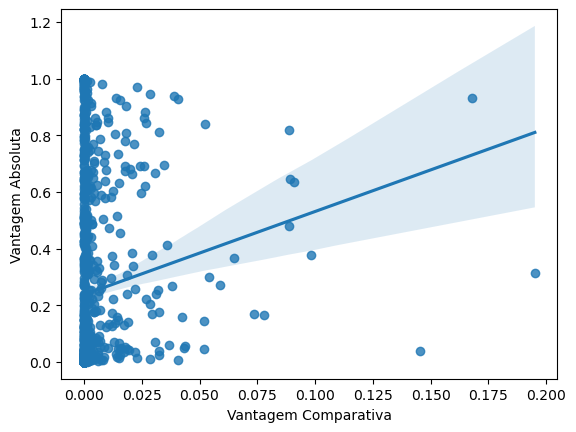

In [12]:
sns.regplot(x='Vantagem Comparativa', y='Vantagem Absoluta', data=export_per_sector_2016)

In [13]:
export_per_sector_2005_2015 = export_per_sector.query("year in [2005, 2015]")
export_per_sector_2005_2015

Export  Exportações Ano  \
Country     Indústria       year                                  
Afghanistan Agriculture     2005  9.691500e-08     1.630965e-07   
                            2015  5.510960e-07     8.342951e-07   
            Mining & Energy 2005  1.125799e-09     1.630965e-07   
                            2015  8.331303e-08     8.342951e-07   
            Manufacturing   2005  6.494013e-08     1.630965e-07   
...                                        ...              ...   
Zambia      Mining & Energy 2015  2.557147e-07     6.825118e-06   
            Manufacturing   2005  2.629360e-06     3.216794e-06   
                            2015  6.002082e-06     6.825118e-06   
            Services        2005  1.382000e-12     3.216794e-06   
                            2015  3.781662e-09     6.825118e-06   

                                  Vantagem Absoluta  \
Country     Indústria       year                      
Afghanistan Agriculture     2005       5.942189e-01   
                            2015       6.605528e-01   
            Mining & Energy 2005       6.902658e-03   
                            2015       9.986039e-02   
            Manufacturing   2005       3.981701e-01   
...                                             ...   
Zambia      Mining & Energy 2015       3.746672e-02   
            Manufacturing   2005       8.173852e-01   
                            2015       8.794108e-01   
            Services        2005       4.296204e-07   
                            2015       5.540801e-04   

                                  Exportações Industria Ano  \
Country     Indústria       year                              
Afghanistan Agriculture     2005                   0.000245   
                            2015                   0.000504   
            Mining & Energy 2005                   0.001146   
                            2015                   0.001433   
            Manufacturing   2005                   0.008754   
...                                                     ...   
Zambia      Mining & Energy 2015                   0.001433   
            Manufacturing   2005                   0.008754   
                            2015                   0.013806   
            Services        2005                   0.003043   
                            2015                   0.003130   

                                  Vantagem Comparativa  
Country     Indústria       year                        
Afghanistan Agriculture     2005          3.956827e-04  
                            2015          1.092866e-03  
            Mining & Energy 2005          9.823776e-07  
                            2015          5.813589e-05  
            Manufacturing   2005          7.418725e-06  
...                                                ...  
Zambia      Mining & Energy 2015          1.784379e-04  
            Manufacturing   2005          3.003766e-04  
                            2015          4.347578e-04  
            Services        2005          4.541376e-10  
                            2015          1.208145e-06  

[1928 rows x 5 columns]

In [14]:
export_per_sector_2005_2015['Log_RCA'] = np.log(export_per_sector_2005_2015['Vantagem Comparativa'])
export_per_sector_2005_2015

C:\Users\pedro\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pedro\AppData\Local\Temp\ipykernel_33616\3753893920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export_per_sector_2005_2015['Log_RCA'] = np.log(export_per_sector_2005_2015['Vantagem Comparativa'])


Export  Exportações Ano  \
Country     Indústria       year                                  
Afghanistan Agriculture     2005  9.691500e-08     1.630965e-07   
                            2015  5.510960e-07     8.342951e-07   
            Mining & Energy 2005  1.125799e-09     1.630965e-07   
                            2015  8.331303e-08     8.342951e-07   
            Manufacturing   2005  6.494013e-08     1.630965e-07   
...                                        ...              ...   
Zambia      Mining & Energy 2015  2.557147e-07     6.825118e-06   
            Manufacturing   2005  2.629360e-06     3.216794e-06   
                            2015  6.002082e-06     6.825118e-06   
            Services        2005  1.382000e-12     3.216794e-06   
                            2015  3.781662e-09     6.825118e-06   

                                  Vantagem Absoluta  \
Country     Indústria       year                      
Afghanistan Agriculture     2005       5.942189e-01   
                            2015       6.605528e-01   
            Mining & Energy 2005       6.902658e-03   
                            2015       9.986039e-02   
            Manufacturing   2005       3.981701e-01   
...                                             ...   
Zambia      Mining & Energy 2015       3.746672e-02   
            Manufacturing   2005       8.173852e-01   
                            2015       8.794108e-01   
            Services        2005       4.296204e-07   
                            2015       5.540801e-04   

                                  Exportações Industria Ano  \
Country     Indústria       year                              
Afghanistan Agriculture     2005                   0.000245   
                            2015                   0.000504   
            Mining & Energy 2005                   0.001146   
                            2015                   0.001433   
            Manufacturing   2005                   0.008754   
...                                                     ...   
Zambia      Mining & Energy 2015                   0.001433   
            Manufacturing   2005                   0.008754   
                            2015                   0.013806   
            Services        2005                   0.003043   
                            2015                   0.003130   

                                  Vantagem Comparativa    Log_RCA  
Country     Indústria       year                                   
Afghanistan Agriculture     2005          3.956827e-04  -7.834898  
                            2015          1.092866e-03  -6.818952  
            Mining & Energy 2005          9.823776e-07 -13.833290  
                            2015          5.813589e-05  -9.752727  
            Manufacturing   2005          7.418725e-06 -11.811503  
...                                                ...        ...  
Zambia      Mining & Energy 2015          1.784379e-04  -8.631270  
            Manufacturing   2005          3.003766e-04  -8.110473  
                            2015          4.347578e-04  -7.740721  
            Services        2005          4.541376e-10 -21.512621  
                            2015          1.208145e-06 -13.626425  

[1928 rows x 6 columns]

In [15]:
export_per_sector_2005_2015 = export_per_sector_2005_2015.reset_index()
export_per_sector_2005_2015

,Country,Indústria,year,Export,Exportações Ano,Vantagem Absoluta,Exportações Industria Ano,Vantagem Comparativa,Log_RCA
0,Afghanistan,Agriculture,2005,9.691500e-08,1.630965e-07,5.942189e-01,0.000245,3.956827e-04,-7.834898
1,Afghanistan,Agriculture,2015,5.510960e-07,8.342951e-07,6.605528e-01,0.000504,1.092866e-03,-6.818952
2,Afghanistan,Mining & Energy,2005,1.125799e-09,1.630965e-07,6.902658e-03,0.001146,9.823776e-07,-13.833290
3,Afghanistan,Mining & Energy,2015,8.331303e-08,8.342951e-07,9.986039e-02,0.001433,5.813589e-05,-9.752727
4,Afghanistan,Manufacturing,2005,6.494013e-08,1.630965e-07,3.981701e-01,0.008754,7.418725e-06,-11.811503
...,...,...,...,...,...,...,...,...,...
1923,Zambia,Mining & Energy,2015,2.557147e-07,6.825118e-06,3.746672e-02,0.001433,1.784379e-04,-8.631270
1924,Zambia,Manufacturing,2005,2.629360e-06,3.216794e-06,8.173852e-01,0.008754,3.003766e-04,-8.110473
1925,Zambia,Manufacturing,2015,6.002082e-06,6.825118e-06,8.794108e-01,0.013806,4.347578e-04,-7.740721
1926,Zambia,Services,2005,1.382000e-12,3.216794e-06,4.296204e-07,0.003043,4.541376e-10,-21.512621


In [16]:
#################################################

In [17]:
pivot_export_per_sector_2005_2015 = export_per_sector_2005_2015.pivot(index=['Country','Indústria'], columns='year', values=['Log_RCA','Vantagem Comparativa'])
pivot_export_per_sector_2005_2015

Log_RCA             \
year                                        2005       2015   
Country               Indústria                               
Afghanistan           Agriculture      -7.834898  -6.818952   
                      Mining & Energy -13.833290  -9.752727   
                      Manufacturing   -11.811503 -11.839178   
                      Services        -17.086631 -10.348803   
Albania               Agriculture      -9.256980  -8.620326   
...                                          ...        ...   
Serbia and Montenegro Services         -8.057726        NaN   
Zambia                Agriculture      -6.425852  -6.796624   
                      Mining & Energy  -8.700287  -8.631270   
                      Manufacturing    -8.110473  -7.740721   
                      Services        -21.512621 -13.626425   

                                      Vantagem Comparativa            
year                                                  2005      2015  
Country               Indústria                                       
Afghanistan           Agriculture             3.956827e-04  0.001093  
                      Mining & Energy         9.823776e-07  0.000058  
                      Manufacturing           7.418725e-06  0.000007  
                      Services                3.796387e-08  0.000032  
Albania               Agriculture             9.544316e-05  0.000180  
...                                                    ...       ...  
Serbia and Montenegro Services                3.166460e-04       NaN  
Zambia                Agriculture             1.619153e-03  0.001118  
                      Mining & Energy         1.665380e-04  0.000178  
                      Manufacturing           3.003766e-04  0.000435  
                      Services                4.541376e-10  0.000001  

[964 rows x 4 columns]

In [18]:
pivot_export_per_sector_2005_2015.reset_index()
pivot_export_per_sector_2005_2015

Log_RCA             \
year                                        2005       2015   
Country               Indústria                               
Afghanistan           Agriculture      -7.834898  -6.818952   
                      Mining & Energy -13.833290  -9.752727   
                      Manufacturing   -11.811503 -11.839178   
                      Services        -17.086631 -10.348803   
Albania               Agriculture      -9.256980  -8.620326   
...                                          ...        ...   
Serbia and Montenegro Services         -8.057726        NaN   
Zambia                Agriculture      -6.425852  -6.796624   
                      Mining & Energy  -8.700287  -8.631270   
                      Manufacturing    -8.110473  -7.740721   
                      Services        -21.512621 -13.626425   

                                      Vantagem Comparativa            
year                                                  2005      2015  
Country               Indústria                                       
Afghanistan           Agriculture             3.956827e-04  0.001093  
                      Mining & Energy         9.823776e-07  0.000058  
                      Manufacturing           7.418725e-06  0.000007  
                      Services                3.796387e-08  0.000032  
Albania               Agriculture             9.544316e-05  0.000180  
...                                                    ...       ...  
Serbia and Montenegro Services                3.166460e-04       NaN  
Zambia                Agriculture             1.619153e-03  0.001118  
                      Mining & Energy         1.665380e-04  0.000178  
                      Manufacturing           3.003766e-04  0.000435  
                      Services                4.541376e-10  0.000001  

[964 rows x 4 columns]

In [19]:
pivot_export_per_sector_2005_2015['Variação Log_RCA'] = pivot_export_per_sector_2005_2015.iloc[:, 1] - pivot_export_per_sector_2005_2015.iloc[:, 0]
pivot_export_per_sector_2005_2015

Log_RCA             \
year                                        2005       2015   
Country               Indústria                               
Afghanistan           Agriculture      -7.834898  -6.818952   
                      Mining & Energy -13.833290  -9.752727   
                      Manufacturing   -11.811503 -11.839178   
                      Services        -17.086631 -10.348803   
Albania               Agriculture      -9.256980  -8.620326   
...                                          ...        ...   
Serbia and Montenegro Services         -8.057726        NaN   
Zambia                Agriculture      -6.425852  -6.796624   
                      Mining & Energy  -8.700287  -8.631270   
                      Manufacturing    -8.110473  -7.740721   
                      Services        -21.512621 -13.626425   

                                      Vantagem Comparativa            \
year                                                  2005      2015   
Country               Indústria                                        
Afghanistan           Agriculture             3.956827e-04  0.001093   
                      Mining & Energy         9.823776e-07  0.000058   
                      Manufacturing           7.418725e-06  0.000007   
                      Services                3.796387e-08  0.000032   
Albania               Agriculture             9.544316e-05  0.000180   
...                                                    ...       ...   
Serbia and Montenegro Services                3.166460e-04       NaN   
Zambia                Agriculture             1.619153e-03  0.001118   
                      Mining & Energy         1.665380e-04  0.000178   
                      Manufacturing           3.003766e-04  0.000435   
                      Services                4.541376e-10  0.000001   

                                      Variação Log_RCA  
year                                                    
Country               Indústria                         
Afghanistan           Agriculture             1.015946  
                      Mining & Energy         4.080563  
                      Manufacturing          -0.027674  
                      Services                6.737828  
Albania               Agriculture             0.636654  
...                                                ...  
Serbia and Montenegro Services                     NaN  
Zambia                Agriculture            -0.370772  
                      Mining & Energy         0.069017  
                      Manufacturing           0.369752  
                      Services                7.886196  

[964 rows x 5 columns]

In [20]:
##########################################################

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
pivot_export_per_sector_2005_2015_1 = pivot_export_per_sector_2005_2015
pivot_export_per_sector_2005_2015_1

Log_RCA             \
year                                        2005       2015   
Country               Indústria                               
Afghanistan           Agriculture      -7.834898  -6.818952   
                      Mining & Energy -13.833290  -9.752727   
                      Manufacturing   -11.811503 -11.839178   
                      Services        -17.086631 -10.348803   
Albania               Agriculture      -9.256980  -8.620326   
...                                          ...        ...   
Serbia and Montenegro Services         -8.057726        NaN   
Zambia                Agriculture      -6.425852  -6.796624   
                      Mining & Energy  -8.700287  -8.631270   
                      Manufacturing    -8.110473  -7.740721   
                      Services        -21.512621 -13.626425   

                                      Vantagem Comparativa            \
year                                                  2005      2015   
Country               Indústria                                        
Afghanistan           Agriculture             3.956827e-04  0.001093   
                      Mining & Energy         9.823776e-07  0.000058   
                      Manufacturing           7.418725e-06  0.000007   
                      Services                3.796387e-08  0.000032   
Albania               Agriculture             9.544316e-05  0.000180   
...                                                    ...       ...   
Serbia and Montenegro Services                3.166460e-04       NaN   
Zambia                Agriculture             1.619153e-03  0.001118   
                      Mining & Energy         1.665380e-04  0.000178   
                      Manufacturing           3.003766e-04  0.000435   
                      Services                4.541376e-10  0.000001   

                                      Variação Log_RCA  
year                                                    
Country               Indústria                         
Afghanistan           Agriculture             1.015946  
                      Mining & Energy         4.080563  
                      Manufacturing          -0.027674  
                      Services                6.737828  
Albania               Agriculture             0.636654  
...                                                ...  
Serbia and Montenegro Services                     NaN  
Zambia                Agriculture            -0.370772  
                      Mining & Energy         0.069017  
                      Manufacturing           0.369752  
                      Services                7.886196  

[964 rows x 5 columns]

In [23]:
pivot_export_per_sector_2005_2015_1.dropna(inplace=True)
pivot_export_per_sector_2005_2015_1

Log_RCA            Vantagem Comparativa  \
year                              2005       2015                 2005   
Country     Indústria                                                    
Afghanistan Agriculture      -7.834898  -6.818952         3.956827e-04   
            Mining & Energy -13.833290  -9.752727         9.823776e-07   
            Manufacturing   -11.811503 -11.839178         7.418725e-06   
            Services        -17.086631 -10.348803         3.796387e-08   
Albania     Agriculture      -9.256980  -8.620326         9.544316e-05   
...                                ...        ...                  ...   
Yemen       Services        -14.190291 -17.101119         6.874401e-07   
Zambia      Agriculture      -6.425852  -6.796624         1.619153e-03   
            Mining & Energy  -8.700287  -8.631270         1.665380e-04   
            Manufacturing    -8.110473  -7.740721         3.003766e-04   
            Services        -21.512621 -13.626425         4.541376e-10   

                                          Variação Log_RCA  
year                                 2015                   
Country     Indústria                                       
Afghanistan Agriculture      1.092866e-03         1.015946  
            Mining & Energy  5.813589e-05         4.080563  
            Manufacturing    7.216231e-06        -0.027674  
            Services         3.203111e-05         6.737828  
Albania     Agriculture      1.804015e-04         0.636654  
...                                   ...              ...  
Yemen       Services         3.741782e-08        -2.910828  
Zambia      Agriculture      1.117542e-03        -0.370772  
            Mining & Energy  1.784379e-04         0.069017  
            Manufacturing    4.347578e-04         0.369752  
            Services         1.208145e-06         7.886196  

[862 rows x 5 columns]

In [24]:
export_per_sector_2005_2015.groupby(['Country', 'Indústria'])['Log_RCA'].diff()
export_per_sector_2005_2015

,Country,Indústria,year,Export,Exportações Ano,Vantagem Absoluta,Exportações Industria Ano,Vantagem Comparativa,Log_RCA
0,Afghanistan,Agriculture,2005,9.691500e-08,1.630965e-07,5.942189e-01,0.000245,3.956827e-04,-7.834898
1,Afghanistan,Agriculture,2015,5.510960e-07,8.342951e-07,6.605528e-01,0.000504,1.092866e-03,-6.818952
2,Afghanistan,Mining & Energy,2005,1.125799e-09,1.630965e-07,6.902658e-03,0.001146,9.823776e-07,-13.833290
3,Afghanistan,Mining & Energy,2015,8.331303e-08,8.342951e-07,9.986039e-02,0.001433,5.813589e-05,-9.752727
4,Afghanistan,Manufacturing,2005,6.494013e-08,1.630965e-07,3.981701e-01,0.008754,7.418725e-06,-11.811503
...,...,...,...,...,...,...,...,...,...
1923,Zambia,Mining & Energy,2015,2.557147e-07,6.825118e-06,3.746672e-02,0.001433,1.784379e-04,-8.631270
1924,Zambia,Manufacturing,2005,2.629360e-06,3.216794e-06,8.173852e-01,0.008754,3.003766e-04,-8.110473
1925,Zambia,Manufacturing,2015,6.002082e-06,6.825118e-06,8.794108e-01,0.013806,4.347578e-04,-7.740721
1926,Zambia,Services,2005,1.382000e-12,3.216794e-06,4.296204e-07,0.003043,4.541376e-10,-21.512621


In [25]:
new_df = pd.DataFrame(columns=['Diff_Log_RCA'])
new_df.loc[:, 'Diff_Log_RCA'] = export_per_sector_2005_2015.groupby(['Country', 'Indústria'])['Log_RCA'].diff().replace([np.inf, -np.inf], np.nan).dropna()
new_df = new_df.reset_index(drop=True)
new_df

,Diff_Log_RCA
0,1.015946
1,4.080563
2,-0.027674
3,6.737828
4,0.636654
...,...
791,-2.910828
792,-0.370772
793,0.069017
794,0.369752


In [26]:
vantagem_comp_2005 = export_per_sector_2005_2015[export_per_sector_2005_2015['year']== 2005].groupby(['Country', 'Indústria'])['Vantagem Comparativa'].first().reset_index().replace([np.inf, -np.inf], np.nan)
vantagem_comp_2005_final_1 = vantagem_comp_2005.dropna()
vantagem_comp_2005_final_1

,Country,Indústria,Vantagem Comparativa
0,Afghanistan,Agriculture,3.956827e-04
1,Afghanistan,Mining & Energy,9.823776e-07
2,Afghanistan,Manufacturing,7.418725e-06
3,Afghanistan,Services,3.796387e-08
4,Albania,Agriculture,9.544316e-05
...,...,...,...
959,Serbia and Montenegro,Services,3.166460e-04
960,Zambia,Agriculture,1.619153e-03
961,Zambia,Mining & Energy,1.665380e-04
962,Zambia,Manufacturing,3.003766e-04


In [27]:
vantagem_comp_2005_final_2 = vantagem_comp_2005_final_1.merge(new_df, left_index=True, right_index=True).set_index('Country')
vantagem_comp_2005_final_2

,Indústria,Vantagem Comparativa,Diff_Log_RCA
Country,,,
Afghanistan,Agriculture,3.956827e-04,1.015946
Afghanistan,Mining & Energy,9.823776e-07,4.080563
Afghanistan,Manufacturing,7.418725e-06,-0.027674
Afghanistan,Services,3.796387e-08,6.737828
Albania,Agriculture,9.544316e-05,0.636654
...,...,...,...
Vietnam,Services,1.009554e-04,-2.910828
Slovenia,Agriculture,4.272466e-04,-0.370772
Slovenia,Mining & Energy,3.408271e-04,0.069017


In [28]:
import statsmodels.api as sm
import pandas as pd

In [29]:
import statsmodels.api as sm

# Define the independent and dependent variables
X = vantagem_comp_2005_final_2['Vantagem Comparativa']
y = vantagem_comp_2005_final_2['Diff_Log_RCA']

# Add a constant to the independent variable (necessary for regression)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Diff_Log_RCA   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.564
Date:                Sat, 25 Mar 2023   Prob (F-statistic):            0.00609
Time:                        17:03:30   Log-Likelihood:                -1547.4
No. Observations:                 768   AIC:                             3099.
Df Residuals:                     766   BIC:                             3108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1425 

In [30]:
# Questão 2 

In [ ]:
# Tratando Base Do Pen Table

In [31]:
pwt = pd.read_excel(r'C:/Users/pedro/Desktop/6 Semestre/aps_comercio/pwt1001.xlsx',sheet_name='Data')
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Pen Table Final

In [75]:
pen_table_1 = pwt[(pwt['year']>=2000) & (pwt['year']<=2016)][['country','year','hc','cn','rnna']].set_index('country')
pen_table_1_axis_name = pen_table_1.rename_axis('Country')
pen_table_1_axis_name

,year,hc,cn,rnna
Country,,,,
Aruba,2000,NaN,17782.451172,9078.891602
Aruba,2001,NaN,18651.441406,9499.203125
Aruba,2002,NaN,19744.576172,9997.826172
Aruba,2003,NaN,21099.484375,10568.648438
Aruba,2004,NaN,22623.337891,11183.025391
...,...,...,...,...
Zimbabwe,2012,2.459828,46195.953125,48841.253906
Zimbabwe,2013,2.504635,50279.375000,50142.707031
Zimbabwe,2014,2.550258,48709.980469,51796.171875


In [ ]:
# Tratando Base do Banco Mundial

In [36]:
wdi = pd.read_csv(r'C:/Users/pedro/Desktop/6 Semestre/aps_comercio/wdi.csv')
wdi.head()

,countryname,countrycode,indicatorname,indicatorcode,v1960,v1961,v1962,v1963,v1964,v1965,...,v2012,v2013,v2014,v2015,v2016,v2017,v2018,v2019,v2020,region
0,Aruba,ABW,Logistics performance index: Competence and qu...,LP.LPI.LOGS.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
1,Aruba,ABW,"External debt stocks, private nonguaranteed (P...",DT.DOD.DPNG.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
2,Aruba,ABW,Time to resolve insolvency (years),IC.ISV.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
3,Aruba,ABW,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
4,Aruba,ABW,Manufactures exports (% of merchandise exports),TX.VAL.MANF.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.143876,20.004849,26.266299,31.860494,32.587242,34.540943,44.056308,NaN,NaN,Latin America & Caribbean


In [55]:
id_vars = ['countryname', 'countrycode', 'indicatorname', 'indicatorcode','region']

# Derreta as colunas de anos em sequência para a nova coluna "Year"
wdi_melted = pd.melt(wdi, id_vars=id_vars, var_name='year', value_name='Value')
wdi_melted['year'] = wdi_melted['year'].str.replace('v', '').astype(int)
wdi_melted.head()

,countryname,countrycode,indicatorname,indicatorcode,region,year,Value
0,Aruba,ABW,Logistics performance index: Competence and qu...,LP.LPI.LOGS.XQ,Latin America & Caribbean,1960,NaN
1,Aruba,ABW,"External debt stocks, private nonguaranteed (P...",DT.DOD.DPNG.CD,Latin America & Caribbean,1960,NaN
2,Aruba,ABW,Time to resolve insolvency (years),IC.ISV.DURS,Latin America & Caribbean,1960,NaN
3,Aruba,ABW,Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,Latin America & Caribbean,1960,NaN
4,Aruba,ABW,Manufactures exports (% of merchandise exports),TX.VAL.MANF.ZS.UN,Latin America & Caribbean,1960,NaN


In [ ]:
# BAse Final do Banco Mundial

In [74]:
wdi_melted_final = wdi_melted[(wdi_melted['indicatorcode'] == 'AG.LND.AGRI.K2') & (wdi_melted['year']>=2000) & (wdi_melted['year']<=2016)][['countryname','indicatorcode','year','Value']].set_index('countryname')
wdi_melted_final_axis_name = wdi_melted_final.rename_axis('Country')
wdi_melted_final_axis_name

,indicatorcode,year,Value
Country,,,
Aruba,AG.LND.AGRI.K2,2000,20.0
Afghanistan,AG.LND.AGRI.K2,2000,377530.0
Angola,AG.LND.AGRI.K2,2000,573000.0
Albania,AG.LND.AGRI.K2,2000,11440.0
Andorra,AG.LND.AGRI.K2,2000,230.0
...,...,...,...
Kosovo,AG.LND.AGRI.K2,2016,NaN
"Yemen, Rep.",AG.LND.AGRI.K2,2016,235460.0
South Africa,AG.LND.AGRI.K2,2016,968410.0


In [ ]:
# Tratando Base Anterior 

In [76]:
export_per_sector.head()

Export  Exportações Ano  \
Country     Indústria   year                                  
Afghanistan Agriculture 2000  6.968200e-08     1.007940e-07   
                        2001  4.295700e-08     7.219116e-08   
                        2002  4.737800e-08     7.481276e-08   
                        2003  7.414500e-08     1.580398e-07   
                        2004  8.118300e-08     1.232708e-07   

                              Vantagem Absoluta  Exportações Industria Ano  \
Country     Indústria   year                                                 
Afghanistan Agriculture 2000           0.691331                   0.000167   
                        2001           0.595045                   0.000164   
                        2002           0.633288                   0.000171   
                        2003           0.469154                   0.000203   
                        2004           0.658575                   0.000234   

                              Vantagem Comparativa  
Country     Indústria   year                        
Afghanistan Agriculture 2000              0.000418  
                        2001              0.000261  
                        2002              0.000276  
                        2003              0.000365  
                        2004              0.000346

In [77]:
export_per_sector['Log_RCA'] = np.log(export_per_sector['Vantagem Comparativa'])
export_per_sector

C:\Users\pedro\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Export  Exportações Ano  \
Country     Indústria   year                                  
Afghanistan Agriculture 2000  6.968200e-08     1.007940e-07   
                        2001  4.295700e-08     7.219116e-08   
                        2002  4.737800e-08     7.481276e-08   
                        2003  7.414500e-08     1.580398e-07   
                        2004  8.118300e-08     1.232708e-07   
...                                    ...              ...   
Zambia      Services    2012  0.000000e+00     9.205841e-06   
                        2013  0.000000e+00     1.315121e-05   
                        2014  5.288000e-12     8.694275e-06   
                        2015  3.781662e-09     6.825118e-06   
                        2016  0.000000e+00     5.481148e-06   

                              Vantagem Absoluta  Exportações Industria Ano  \
Country     Indústria   year                                                 
Afghanistan Agriculture 2000       6.913305e-01                   0.000167   
                        2001       5.950451e-01                   0.000164   
                        2002       6.332877e-01                   0.000171   
                        2003       4.691539e-01                   0.000203   
                        2004       6.585747e-01                   0.000234   
...                                         ...                        ...   
Zambia      Services    2012       0.000000e+00                   0.002977   
                        2013       0.000000e+00                   0.002768   
                        2014       6.082163e-07                   0.003249   
                        2015       5.540801e-04                   0.003130   
                        2016       0.000000e+00                   0.003126   

                              Vantagem Comparativa    Log_RCA  
Country     Indústria   year                                   
Afghanistan Agriculture 2000          4.181738e-04  -7.779613  
                        2001          2.612461e-04  -8.250048  
                        2002          2.762608e-04  -8.194165  
                        2003          3.648602e-04  -7.915996  
                        2004          3.462590e-04  -7.968324  
...                                            ...        ...  
Zambia      Services    2012          0.000000e+00       -inf  
                        2013          0.000000e+00       -inf  
                        2014          1.627803e-09 -20.236035  
                        2015          1.208145e-06 -13.626425  
                        2016          0.000000e+00       -inf  

[16388 rows x 6 columns]

In [79]:
export_per_sector_reset_1 = export_per_sector.reset_index()
export_per_sector_reset_1

,Country,Indústria,year,Export,Exportações Ano,Vantagem Absoluta,Exportações Industria Ano,Vantagem Comparativa,Log_RCA
0,Afghanistan,Agriculture,2000,6.968200e-08,1.007940e-07,6.913305e-01,0.000167,4.181738e-04,-7.779613
1,Afghanistan,Agriculture,2001,4.295700e-08,7.219116e-08,5.950451e-01,0.000164,2.612461e-04,-8.250048
2,Afghanistan,Agriculture,2002,4.737800e-08,7.481276e-08,6.332877e-01,0.000171,2.762608e-04,-8.194165
3,Afghanistan,Agriculture,2003,7.414500e-08,1.580398e-07,4.691539e-01,0.000203,3.648602e-04,-7.915996
4,Afghanistan,Agriculture,2004,8.118300e-08,1.232708e-07,6.585747e-01,0.000234,3.462590e-04,-7.968324
...,...,...,...,...,...,...,...,...,...
16383,Zambia,Services,2012,0.000000e+00,9.205841e-06,0.000000e+00,0.002977,0.000000e+00,-inf
16384,Zambia,Services,2013,0.000000e+00,1.315121e-05,0.000000e+00,0.002768,0.000000e+00,-inf
16385,Zambia,Services,2014,5.288000e-12,8.694275e-06,6.082163e-07,0.003249,1.627803e-09,-20.236035
16386,Zambia,Services,2015,3.781662e-09,6.825118e-06,5.540801e-04,0.003130,1.208145e-06,-13.626425


In [ ]:
# Base parte 2.1 Final 

In [84]:
export_per_sector_reset_1_final = export_per_sector_reset_1[['Country','Indústria','year','Log_RCA']].replace([np.inf, -np.inf], np.nan).set_index('Country').dropna()
export_per_sector_reset_1_final

,Indústria,year,Log_RCA
Country,,,
Afghanistan,Agriculture,2000,-7.779613
Afghanistan,Agriculture,2001,-8.250048
Afghanistan,Agriculture,2002,-8.194165
Afghanistan,Agriculture,2003,-7.915996
Afghanistan,Agriculture,2004,-7.968324
...,...,...,...
Zambia,Services,2008,-18.496683
Zambia,Services,2009,-19.851654
Zambia,Services,2010,-12.902131


In [ ]:
# Juntando as Bases

In [89]:
ultra_base_final_merged = pen_table_1_axis_name.merge(wdi_melted_final_axis_name, on=['Country', 'year']) \
                          .merge(export_per_sector_reset_1_final, on=['Country', 'year'])
ultra_base_final_merged_sem_na = ultra_base_final_merged.dropna()
ultra_base_final_merged_sem_na.head()

,year,hc,cn,rnna,indicatorcode,Value,Indústria,Log_RCA
Country,,,,,,,,
Angola,2000,1.296941,318987.62500,779971.9375,AG.LND.AGRI.K2,573000.0,Agriculture,-10.887326
Angola,2000,1.296941,318987.62500,779971.9375,AG.LND.AGRI.K2,573000.0,Mining & Energy,-4.236115
Angola,2000,1.296941,318987.62500,779971.9375,AG.LND.AGRI.K2,573000.0,Manufacturing,-9.966423
Angola,2001,1.308486,322602.53125,781995.6875,AG.LND.AGRI.K2,573000.0,Agriculture,-11.644910
Angola,2001,1.308486,322602.53125,781995.6875,AG.LND.AGRI.K2,573000.0,Mining & Energy,-4.345471


In [ ]:
# Mesma base, Porém agora para o ano de 2016

In [94]:
ultra_base_final_merged_sem_na_2016 = ultra_base_final_merged_sem_na[ultra_base_final_merged_sem_na['year']== 2016]
ultra_base_final_merged_sem_na_2016 = ultra_base_final_merged_sem_na_2016.rename(columns={'Value': 'Tamanho da Terra Agricola'})
ultra_base_final_merged_sem_na_2016.head()

,year,hc,cn,rnna,indicatorcode,Tamanho da Terra Agricola,Indústria,Log_RCA
Country,,,,,,,,
Angola,2016,1.460044,1.092634e+06,1.267231e+06,AG.LND.AGRI.K2,591900.000000,Agriculture,-12.901946
Angola,2016,1.460044,1.092634e+06,1.267231e+06,AG.LND.AGRI.K2,591900.000000,Mining & Energy,-3.769235
Angola,2016,1.460044,1.092634e+06,1.267231e+06,AG.LND.AGRI.K2,591900.000000,Manufacturing,-9.762842
Angola,2016,1.460044,1.092634e+06,1.267231e+06,AG.LND.AGRI.K2,591900.000000,Services,-13.386504
Albania,2016,2.944339,2.135815e+05,2.063423e+05,AG.LND.AGRI.K2,11816.999512,Agriculture,-8.430645


In [ ]:
# Realizando a Regressão

In [95]:
# Define the independent and dependent variables
y = ultra_base_final_merged_sem_na_2016['Log_RCA']
X = ultra_base_final_merged_sem_na_2016['Tamanho da Terra Agricola']

# Add a constant to the independent variable (necessary for regression)
X = sm.add_constant(X)

# Fit the regression model
model_terras = sm.OLS(y, X).fit()

# Print the model summary
print(model_terras.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_RCA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     43.51
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.16e-10
Time:                        18:12:57   Log-Likelihood:                -1176.7
No. Observations:                 465   AIC:                             2357.
Df Residuals:                     463   BIC:                             2366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<AxesSubplot:xlabel='Tamanho da Terra Agricola', ylabel='Log_RCA'>

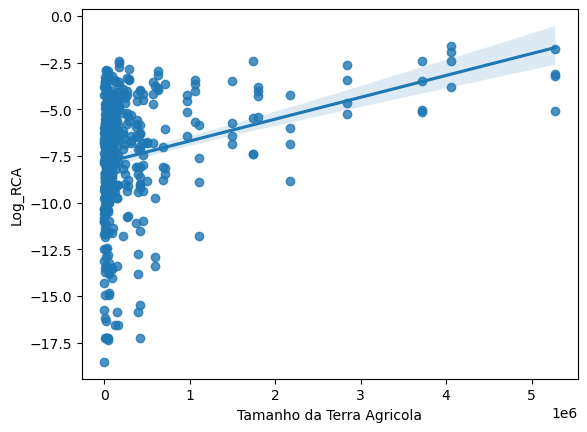

In [96]:
sns.regplot(x='Tamanho da Terra Agricola', y='Log_RCA', data=ultra_base_final_merged_sem_na_2016)
plt.title('Regressão entre Tamanho da Terra Agricola e Log_RCA')
plt.show()

In [99]:
# Define the independent and dependent variables
y = ultra_base_final_merged_sem_na_2016['Log_RCA']
X = ultra_base_final_merged_sem_na_2016['hc']

# Add a constant to the independent variable (necessary for regression)
X = sm.add_constant(X)

# Fit the regression model
model_hc = sm.OLS(y, X).fit()

# Print the model summary
print(model_hc.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_RCA   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     125.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.33e-26
Time:                        18:15:48   Log-Likelihood:                -1142.0
No. Observations:                 465   AIC:                             2288.
Df Residuals:                     463   BIC:                             2296.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.3535      0.542    -24.620      0.0

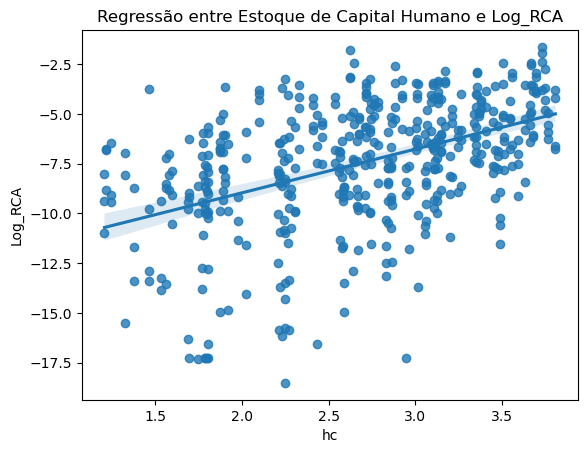

In [100]:
sns.regplot(x='hc', y='Log_RCA', data=ultra_base_final_merged_sem_na_2016)
plt.title('Regressão entre Estoque de Capital Humano e Log_RCA')
plt.show()

In [101]:
# Define the independent and dependent variables
y = ultra_base_final_merged_sem_na_2016['Log_RCA']
X = ultra_base_final_merged_sem_na_2016['cn']

# Add a constant to the independent variable (necessary for regression)
X = sm.add_constant(X)

# Fit the regression model
model_cn = sm.OLS(y, X).fit()

# Print the model summary
print(model_cn.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_RCA   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     71.67
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           3.38e-16
Time:                        18:17:59   Log-Likelihood:                -1164.1
No. Observations:                 465   AIC:                             2332.
Df Residuals:                     463   BIC:                             2340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8878      0.146    -53.981      0.0

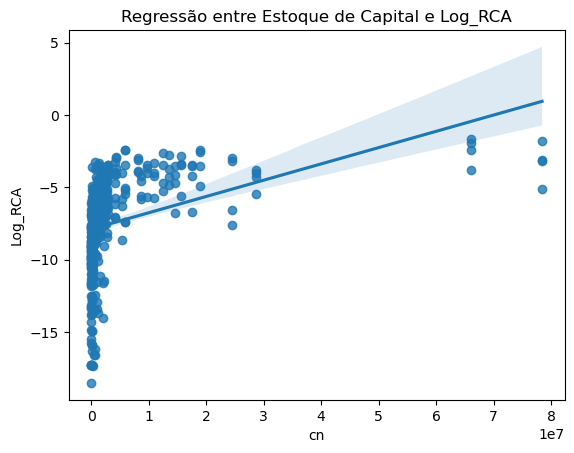

In [102]:
sns.regplot(x='cn', y='Log_RCA', data=ultra_base_final_merged_sem_na_2016)
plt.title('Regressão entre Estoque de Capital e Log_RCA')
plt.show()